### Lab 1. PyTorch Basics

Yandex Contest link https://contest.yandex.ru/contest/59817/

The first problem set contains basic tasks in PyTorch.

__Note:__ Instead of doing this part of homework, you can prove your skills otherwise:
* A commit to PyTorch or PyTorch-based repos will do
* Fully implemented seminar assignment in tensorflow or theano will do
* Your own project in PyTorch that is developed to a state in which a normal human can understand and appreciate what it does

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch, torch.nn as nn
import torch.nn.functional as F
print(torch.__version__)

2.2.2+cu121


### Task I - tensormancy

![img](https://media.giphy.com/media/3o751UMCYtSrRAFRFC/giphy.gif)

When dealing with more complex stuff like neural network, it's best if you use tensors the way samurai uses his sword. 


__1.1 The Cannabola__
[(_disclaimer_)](https://gist.githubusercontent.com/justheuristic/e2c1fa28ca02670cabc42cacf3902796/raw/fd3d935cef63a01b85ed2790b5c11c370245cbd7/stddisclaimer.h)

Let's write function in polar coordinates:
$$\rho(\theta) = (1 + 0.9 \cdot cos (8 \cdot \theta) ) \cdot (1 + 0.1 \cdot cos(24 \cdot \theta)) \cdot (0.9 + 0.05 \cdot cos(200 \cdot \theta)) \cdot (1 + sin(\theta))$$

Then convert it into cartesian coordinates ([howto](http://www.mathsisfun.com/polar-cartesian-coordinates.html)) and plot the results.

Use torch tensors only: no lists, loops, numpy arrays, etc.

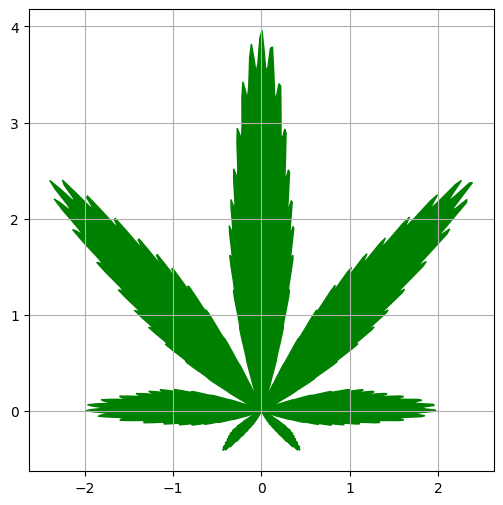

In [2]:
theta = torch.linspace(-np.pi, np.pi, steps=1000)

# compute rho(theta) as per formula above
# HERE YOUR CODE
rho = (1 + 0.9*torch.cos(8*theta))*(1 + 0.1*torch.cos(24*theta))*(0.9 + 0.05*torch.cos(200*theta))*(1 + torch.sin(theta))
# TILL THERE

# Now convert polar (rho, theta) pairs into cartesian (x,y) to plot them.
x = rho * torch.cos(theta)
y = rho * torch.sin(theta)
# HERE YOUR CODE
pass
# TILL THERE

plt.figure(figsize=[6, 6])
plt.fill(x.numpy(), y.numpy(), color='green')
plt.grid()

If there is something beautiful above — it's time to check your solution. Code below generates .json file.

**Task 1 (2 points). Send file .json to Yandex Contest.**

In [3]:
import json
z = np.concatenate([x, y])

with open('answer_1.json', 'w') as f:
    json.dump(z.tolist(), f)

### Task II: The Game of Life

Now it's time for you to make something more challenging. We'll implement Conway's [Game of Life](https://web.stanford.edu/class/sts129/Alife/html/Life.htm) in _pure PyTorch_.

While this is still a toy task, implementing game of life this way has one cool benefit: __you'll be able to run it on GPU!__ Indeed, what could be a better use of your GPU than simulating Game of Life on 1M/1M grids?

![img](https://cdn.tutsplus.com/gamedev/authors/legacy/Stephane%20Beniak/2012/09/11/Preview_Image.png)

If you've skipped the URL above out of sloth, here's the Game of Life:
* You have a 2D grid of cells, where each cell is "alive"(1) or "dead"(0)
* Any living cell that has 2 or 3 neighbors survives, else it dies [0,1 or 4+ neighbors]
* Any cell with exactly 3 neighbors becomes alive (if it was dead)

For this task, you are given a reference NumPy implementation that you must convert to PyTorch.
_NumPy code inspired by: https://github.com/rougier/numpy-100_


__Note:__ You can find convolution in `torch.nn.functional.conv2d(Z,filters)`. Note that it has a different input format.

__Note 2:__ From the mathematical standpoint, PyTorch convolution is actually cross-correlation. Those two are very similar operations. More info: [video tutorial](https://www.youtube.com/watch?v=C3EEy8adxvc), [scipy functions review](https://stackoverflow.com/questions/16121269/2d-convolution-in-python-similar-to-matlabs-conv2), [stack overflow source](https://stackoverflow.com/questions/31139977/comparing-matlabs-conv2-with-scipys-convolve2d).

In [4]:
from scipy.signal import correlate2d

def np_update(Z):
    # Count neighbours with convolution
    filters = np.array([[1, 1, 1],
                        [1, 0, 1],
                        [1, 1, 1]])

    N = correlate2d(Z, filters, mode='same')

    # Apply rules
    birth = (N == 3) & (Z == 0)
    survive = ((N == 2) | (N == 3)) & (Z == 1)

    Z[:] = birth | survive
    return Z

In [5]:
import torch as nn
import torch.nn.functional as F  
def torch_update(Z):
    """
    Implement an update function that does to Z exactly the same as np_update.
    :param Z: torch.FloatTensor of shape [height,width] containing 0s(dead) an 1s(alive)
    :returns: torch.FloatTensor Z after updates.
    
    You can opt to create new tensor or change Z inplace.
    """
    # import ...
    # HERE YOUR CODE
  
    
    filters = nn.tensor([[1, 1, 1],
                         [1, 0, 1],
                         [1, 1, 1]], dtype=nn.float32, )
    N = F.conv2d(Z.view(1, 1, Z.shape[0], Z.shape[1]), filters.view(1, 1, 3, 3), padding=1)[0, 0]
    birth = (N == 3) & (Z == 0)
    survive = ((N == 2) | (N == 3)) & (Z == 1)
    Z[:] = birth | survive
    return Z
    # TILL THERE

In [6]:
# initial frame
Z_numpy = np.random.choice([0, 1], p=(0.5, 0.5), size=(100, 100))
Z = torch.from_numpy(Z_numpy).type(torch.FloatTensor)

# your debug polygon :)
Z_new = torch_update(Z.clone())

# tests
Z_reference = np_update(Z_numpy.copy())
assert np.all(Z_new.numpy() == Z_reference), \
    "your PyTorch implementation doesn't match np_update. Look into Z and np_update(ZZ) to investigate."
print("Well done!")

Well done!


**Task 2 (2 points). Send code of `torch_update` func with imports to Yandex Contest.**

/tmp/ipykernel_1863831/271603058.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


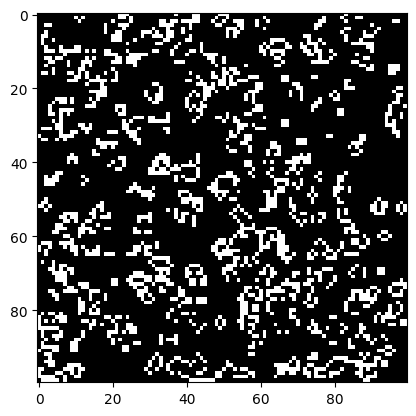

In [7]:
%matplotlib inline
plt.ion()

# initialize game field
Z = np.random.choice([0, 1], size=(100, 100))
Z = torch.from_numpy(Z).type(torch.FloatTensor)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(10):
    # update
    Z = torch_update(Z)

    # re-draw image
    ax.clear()
    ax.imshow(Z.numpy(), cmap='gray')
    fig.canvas.draw()

/tmp/ipykernel_1863831/1142352932.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


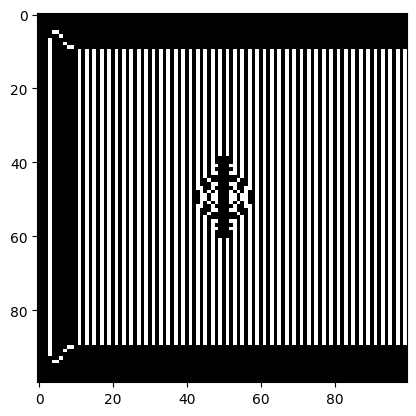

In [8]:
# Some fun setups for your amusement

# parallel stripes
Z = np.arange(100) % 2 + np.zeros([100, 100])
# with a small imperfection
Z[48:52, 50] = 1

Z = torch.from_numpy(Z).type(torch.FloatTensor)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(10):
    Z = torch_update(Z)
    ax.clear()
    ax.imshow(Z.numpy(), cmap='gray')
    fig.canvas.draw()

More fun with Game of Life: [video](https://www.youtube.com/watch?v=C2vgICfQawE) and/or [Jupyter Notebook](https://nbviewer.jupyter.org/url/norvig.com/ipython/Life.ipynb)

### Task III: Going deeper
<img src="http://download.gamezone.com/uploads/image/data/1190338/article_post_width_a88.jpg" width=360>

Your third trial is to build your first neural network [almost] from scratch and pure PyTorch.

This time you will solve yet another digit recognition problem, but at a greater scale

* 10 different letters
* 20k samples

We want you to build a network that reaches at least 80% accuracy and has at least 2 linear layers in it. Naturally, it should be nonlinear to beat logistic regression.


With 10 classes you will need to use __Softmax__ at the top instead of sigmoid and train using __categorical crossentropy__  (see [here](https://keras.io/api/losses/probabilistic_losses/)).  Write your own loss or use `torch.nn.functional.nll_loss`. Just make sure you understand what it accepts as input.

Note that you are not required to build 152-layer monsters here. A 2-layer (one hidden, one output) neural network should already give you an edge over logistic regression.

__[bonus kudos]__
If you've already beaten logistic regression with a two-layer net, but enthusiasm still ain't gone, you can try improving the test accuracy even further! It should be possible to reach 90% without convnets.

__SPOILERS!__
At the end of the notebook you will find a few tips and frequent errors.
If you feel confident enough, just start coding right away and get there ~~if~~ once you need to untangle yourself.

In [9]:
!wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_DL/fall21/week02_autodiff/notmnist.py

In [10]:
from notmnist import load_notmnist
X_train, y_train, X_test, y_test = load_notmnist(letters='ABCDEFGHIJ')
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

ModuleNotFoundError: No module named 'skimage'

In [ ]:
%matplotlib inline
plt.figure(figsize=[12, 4])
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_train[i].reshape([28, 28]))
    plt.title(str(y_train[i]))

# 0. Utils

In [ ]:
import torch
import numpy as np

def set_seed(random_seed: int = 42):
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)

# 1. Data

In [ ]:
from torch.utils.data import Dataset, DataLoader

set_seed()
BATCH_SIZE = 512


'''
Your dataset item contains image and label (order matters — see train loop!)
'''
class NotMNISTDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        # HERE YOUR CODE
        pass
        # TILL THERE

        return image, label

train_not_mnist_dataset = NotMNISTDataset(images=X_train, labels=y_train)
train_not_mnist_dataloader = DataLoader(
    train_not_mnist_dataset,
    batch_size=BATCH_SIZE,
)

test_not_mnist_dataset = NotMNISTDataset(images=X_test, labels=y_test)
test_not_mnist_dataloader = DataLoader(
    test_not_mnist_dataset,
    batch_size=BATCH_SIZE,
)

# HERE ASSERT
#for b in test_not_mnist_dataloader:
#    im, lab = b
#    print(im.shape)
#    break

**Task 3 (2 points). Send code of `NotMNISTDataset` class to Yandex Contest.**

# 2. Model

In [ ]:
import torch
import torch.nn as nn


'''
hidden_dim=100 just works
'''
class SimpleModel(nn.Module):
    def __init__(self, hidden_dim: int = 100):
        super().__init__()
        # HERE YOUR CODE
        pass
        # TILL THERE

    def forward(self, images):
        # HERE YOU CODE
        pass
        # TILL THERE

**Task 4 (4 points). Send code of `SimpleModel` class to Yandex Contest.**

# 3. Train

In [ ]:
import torch.nn.functional as F
import tqdm

set_seed()

def calc_batch_avg_accuracy(predicts, labels, batch_size):
    return (predicts.argmax(dim=1) == labels).sum() / BATCH_SIZE


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleModel()
model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) #0.0003

accs = []
train_accs = []
train_losses = []
n_epochs = 100

def calc_loss(model, images, labels):
    predicts = model(images)
    loss_value = F.nll_loss(predicts, labels)

    return loss_value

for epoch in tqdm.tqdm(range(n_epochs)):
    avg_loss = 0

    for batch in train_not_mnist_dataloader:
        images, labels = batch
        images = images.to(device)
        labels = labels.to(device)

        loss_value = calc_loss(model, images, labels)

        optimizer.zero_grad()
        loss_value.backward()
        optimizer.step()

        avg_loss += loss_value.item()

    train_losses.append(avg_loss)

    avg_acc = 0
        
    for batch in test_not_mnist_dataloader:
        images, labels = batch
        images = images.to(device)
        labels = labels.to(device)

        predicts = model(images)

        accuracy = calc_batch_avg_accuracy(predicts, labels, batch_size=BATCH_SIZE)
        avg_acc += accuracy
        
    avg_acc /= len(test_not_mnist_dataloader)
    accs.append(avg_acc)

In [ ]:
import matplotlib.pyplot as plt

accs = [acc.cpu() for acc in accs]
plt.grid()
plt.plot(np.arange(0, n_epochs), accs)

In [ ]:
import matplotlib.pyplot as plt

plt.grid()
plt.plot(np.arange(0, n_epochs), train_losses)

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

# SPOILERS!

Recommended pipeline:

* Adapt logistic regression from seminar assignment to classify one letter against others (e.g. A vs the rest)
* Generalize it to multiclass logistic regression.
  - Either try to remember lecture 0 or google it.
  - Instead of weight vector you'll have to use matrix (feature_id x class_id)
  - Softmax (exp over sum of exps) can be implemented manually or as `nn.Softmax` (layer) or `F.softmax` (function)
  - Probably better to use STOCHASTIC gradient descent (minibatch) for greater speed
    - You can also try momentum/rmsprop/adawhatever
    - in which case the dataset should probably be shuffled (or use random subsamples on each iteration)
* Add a hidden layer. Now your logistic regression uses hidden neurons instead of inputs.
  - Hidden layer uses the same math as output layer (ex-logistic regression), but uses some nonlinearity (e.g. sigmoid) instead of softmax
  - You need to train both layers, not just the output layer :)
  - 50 hidden neurons and a sigmoid nonlinearity will do for a start. Many ways to improve.
  - In ideal case this totals to 2 `torch.matmul`'s, 1 softmax and 1 ReLU/sigmoid
  - __Make sure this neural network works better than logistic regression!__

* Now's the time to try improving the network. Consider layers (size, neuron count), nonlinearities, optimization methods, initialization — whatever you want, but please avoid convolutions for now.

* If anything seems wrong, try going through one step of training and printing everything you compute.
* If you see NaNs midway through optimization, you can estimate $\log P(y \mid x)$ as `F.log_softmax(layer_before_softmax)`.